In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")

In [35]:
import pandas as pd
file_path = '/content/train (1).csv'
df = pd.read_csv(file_path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.00,0,0,...,7,1810,0,1961,0,98055,47.44,-122.19,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.00,0,0,...,7,1600,0,1992,0,98031,47.40,-122.19,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.00,0,0,...,8,1720,0,1994,0,98003,47.27,-122.31,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.00,0,0,...,7,1150,90,2009,0,98027,47.53,-122.07,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.00,0,0,...,7,1280,0,1994,0,98042,47.37,-122.07,1590,8071


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [4]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


Top Features Correlated with Price:
price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
Name: price, dtype: float64


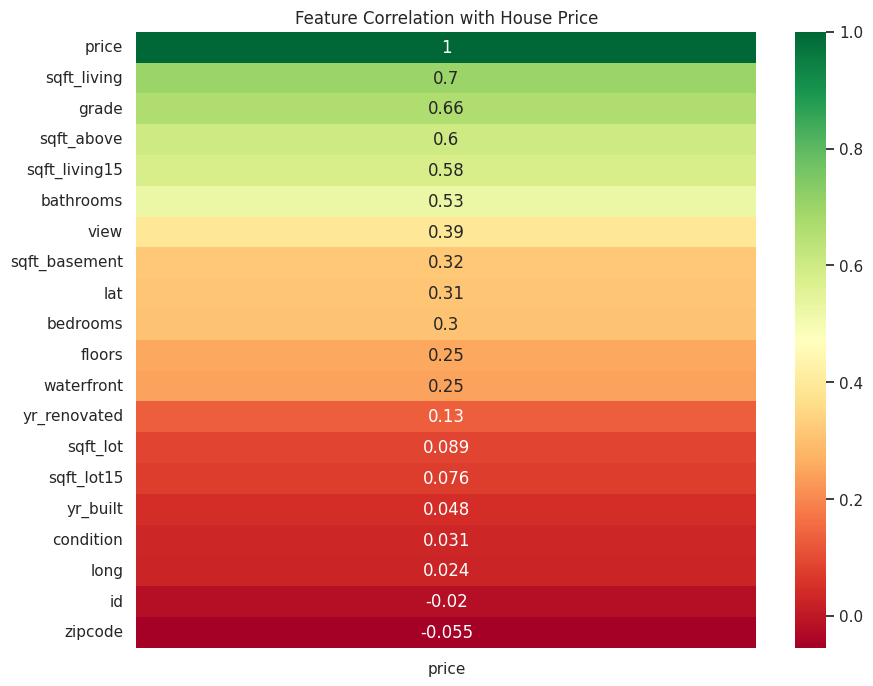

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# The 'numeric_only=True' is the magic fix here
correlations = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

print("Top Features Correlated with Price:")
print(correlations.head(10))

# For the Heatmap
plt.figure(figsize=(10, 8))
# Again, add numeric_only=True here
sns.heatmap(df.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='RdYlGn')

plt.title("Feature Correlation with House Price")
plt.show()

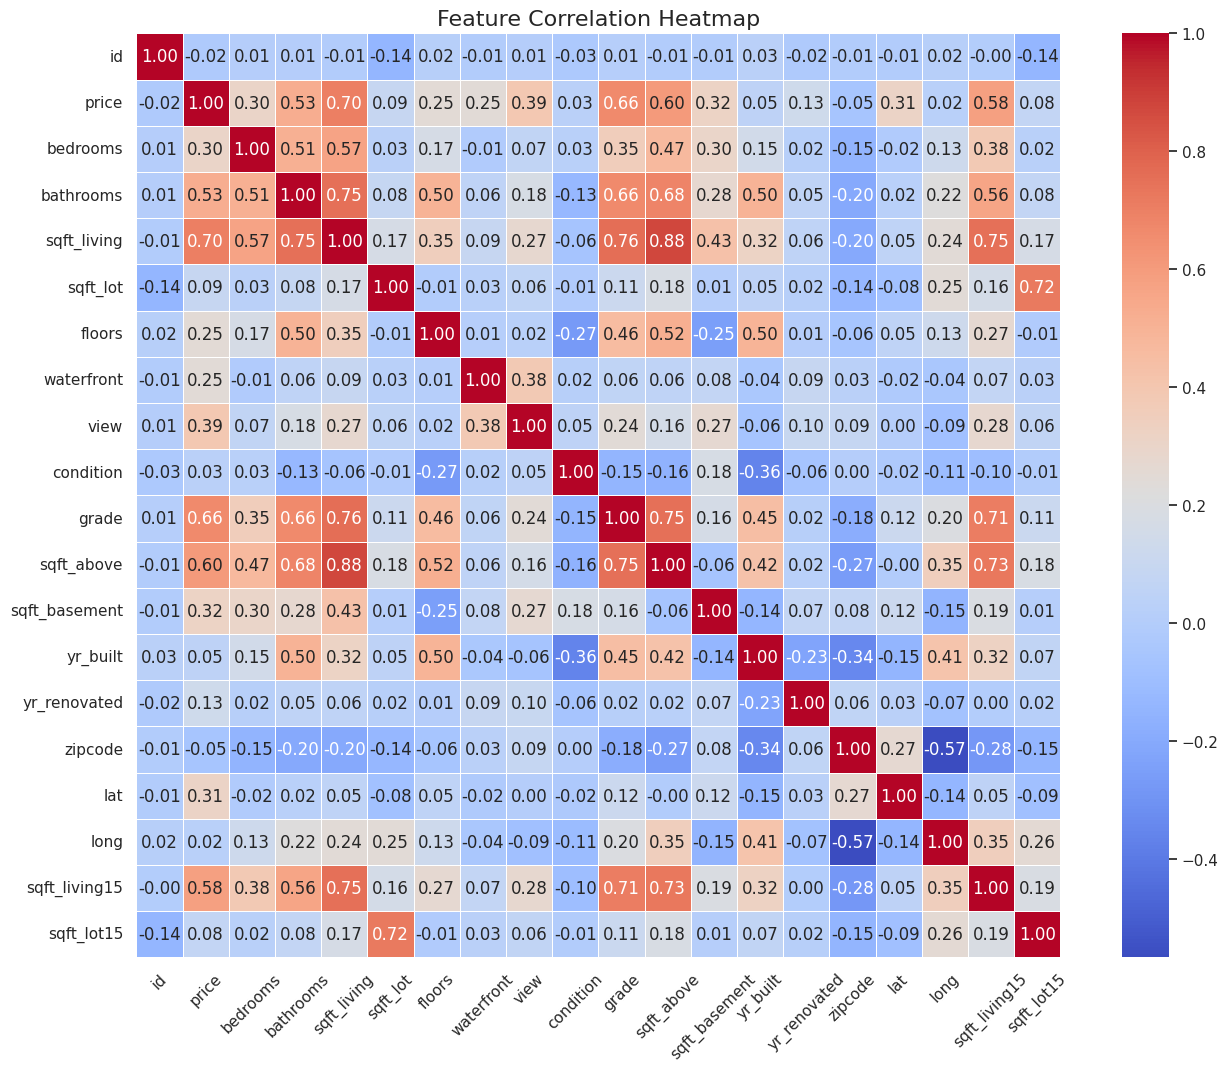

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# 2. Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            square=True)

# 4. Final touches
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45) # Rotates labels so they don't overlap
plt.show()

In [7]:
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)


In [9]:

df['date'] = pd.to_datetime(df['date'])

# 3. Create New Features
df['sales_year'] = df['date'].dt.year
df['sales_month'] = df['date'].dt.month

df['house_age'] = df['sales_year'] - df['yr_built']

# 4. Now drop the original string 'date' column so it doesn't break the model
df = df.drop(columns=['date'])

# Check the new columns
print(df[['price', 'sales_year', 'sales_month', 'house_age']].head())

    price  sales_year  sales_month  house_age
0  268643        2015            5         54
1  245000        2014            7         22
2  200000        2015            1         21
3  352499        2015            4          6
4  232000        2014           12         20


In [10]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,sales_year,sales_month,house_age
0,9117000170,268643,4,2.25,1810,9240,2.0,0,0,3,...,0,98055,47.4362,-122.187,1660,9240,0,2015,5,54
1,6700390210,245000,3,2.50,1600,2788,2.0,0,0,4,...,0,98031,47.4034,-122.187,1720,3605,0,2014,7,22
2,7212660540,200000,4,2.50,1720,8638,2.0,0,0,3,...,0,98003,47.2704,-122.313,1870,7455,0,2015,1,21
3,8562780200,352499,2,2.25,1240,705,2.0,0,0,3,...,0,98027,47.5321,-122.073,1240,750,0,2015,4,6
4,7760400350,232000,3,2.00,1280,13356,1.0,0,0,3,...,0,98042,47.3715,-122.074,1590,8071,0,2014,12,20


In [11]:

df = df.drop(columns=['yr_renovated'])

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,9117000170,20150505T000000,268643.0,4.0,2.25,1810.0,9240.0,2.0,0.0,0.0,...,7.0,1810.0,0.0,1961.0,98055.0,47.4362,-122.187,1660.0,9240.0,0
1,6700390210,20140708T000000,245000.0,3.0,2.50,1600.0,2788.0,2.0,0.0,0.0,...,7.0,1600.0,0.0,1992.0,98031.0,47.4034,-122.187,1720.0,3605.0,0
2,7212660540,20150115T000000,200000.0,4.0,2.50,1720.0,8638.0,2.0,0.0,0.0,...,8.0,1720.0,0.0,1994.0,98003.0,47.2704,-122.313,1870.0,7455.0,0
3,8562780200,20150427T000000,352499.0,2.0,2.25,1240.0,705.0,2.0,0.0,0.0,...,7.0,1150.0,90.0,2009.0,98027.0,47.5321,-122.073,1240.0,750.0,0
4,7760400350,20141205T000000,232000.0,3.0,2.00,1280.0,13356.0,1.0,0.0,0.0,...,7.0,1280.0,0.0,1994.0,98042.0,47.3715,-122.074,1590.0,8071.0,0


In [12]:

df = df.drop(columns=['id'])

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated,sales_year,sales_month,house_age
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,...,1961,98055,47.4362,-122.187,1660,9240,0,2015,5,54
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,...,1992,98031,47.4034,-122.187,1720,3605,0,2014,7,22
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,...,1994,98003,47.2704,-122.313,1870,7455,0,2015,1,21
3,352499,2,2.25,1240,705,2.0,0,0,3,7,...,2009,98027,47.5321,-122.073,1240,750,0,2015,4,6
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,...,1994,98042,47.3715,-122.074,1590,8071,0,2014,12,20


In [16]:
df = df.drop(columns=['sqft_living'])

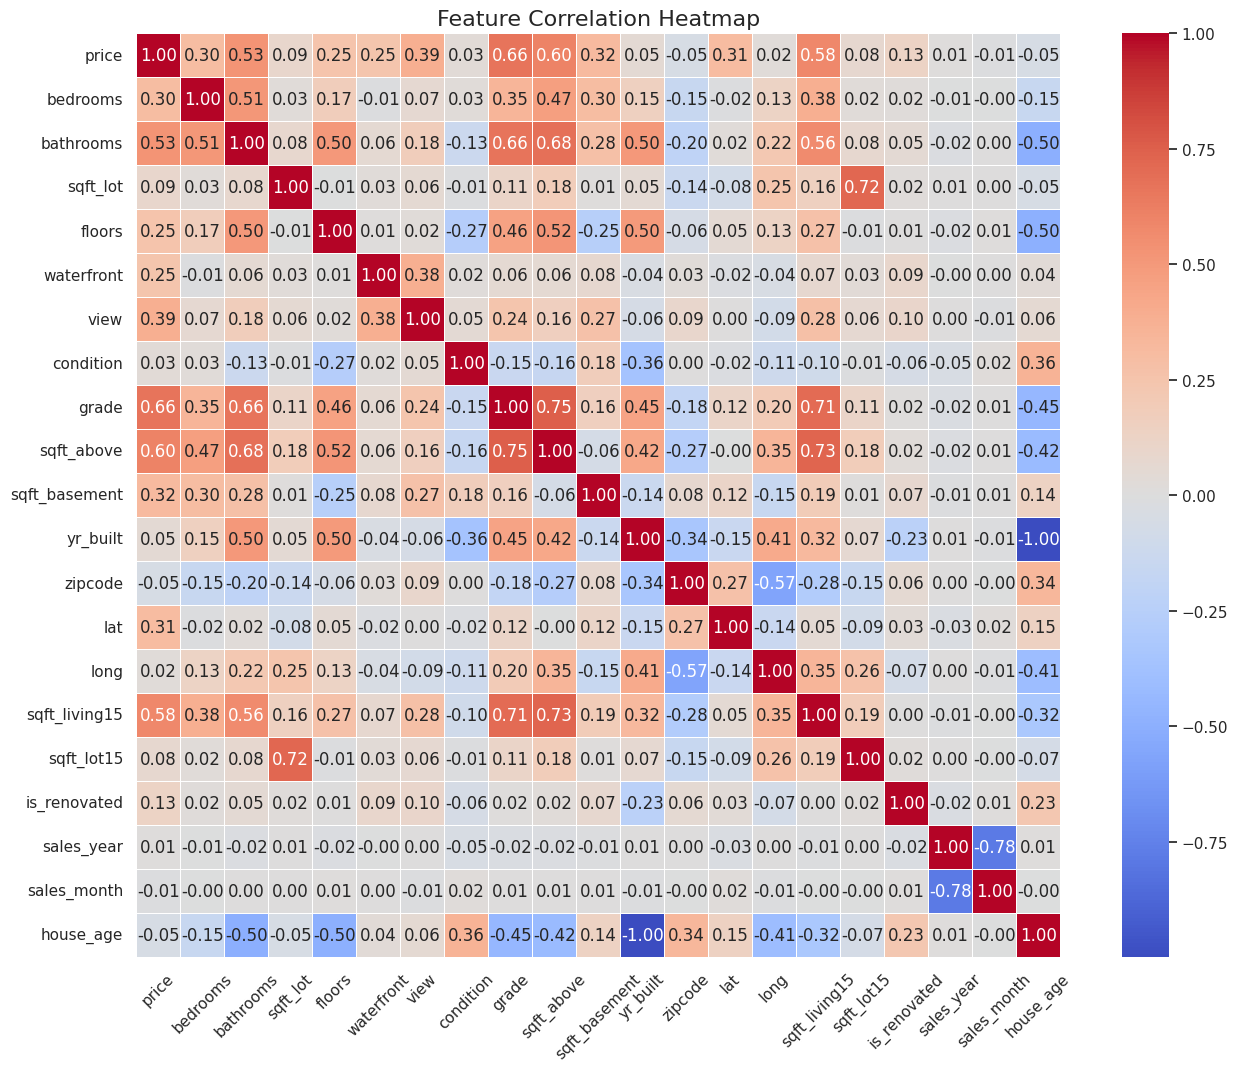

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            square=True)

plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45) # Rotates labels so they don't overlap
plt.show()

In [18]:
df = df.drop(columns=['zipcode']) #as we already have lat and long which are more precise

In [20]:
df = df.drop(columns=['yr_built'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16209 non-null  int64  
 1   bedrooms       16209 non-null  int64  
 2   bathrooms      16209 non-null  float64
 3   sqft_lot       16209 non-null  int64  
 4   floors         16209 non-null  float64
 5   waterfront     16209 non-null  int64  
 6   view           16209 non-null  int64  
 7   condition      16209 non-null  int64  
 8   grade          16209 non-null  int64  
 9   sqft_above     16209 non-null  int64  
 10  sqft_basement  16209 non-null  int64  
 11  lat            16209 non-null  float64
 12  long           16209 non-null  float64
 13  sqft_living15  16209 non-null  int64  
 14  sqft_lot15     16209 non-null  int64  
 15  is_renovated   16209 non-null  int64  
 16  sales_year     16209 non-null  int32  
 17  sales_month    16209 non-null  int32  
 18  house_

In [24]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale, excluding 'price' (target variable)
numerical_cols = df.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()
numerical_cols.remove('price')
numerical_cols.remove('is_renovated')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected numerical columns
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("DataFrame scaled successfully!")
display(df_scaled.head())

DataFrame scaled successfully!


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,is_renovated,sales_year,sales_month,house_age
0,268643,0.677402,0.178963,-0.144952,0.922943,-0.083788,-0.306964,-0.626000,-0.557611,0.030720,-0.657843,-0.900034,0.192759,-0.473911,-0.129791,0,1.451126,-0.507879,0.368733
1,245000,-0.394132,0.505667,-0.311135,0.922943,-0.083788,-0.306964,0.908842,-0.557611,-0.224818,-0.657843,-1.137139,0.192759,-0.385919,-0.339019,0,-0.689120,0.134535,-0.720704
2,200000,0.677402,0.505667,-0.160457,0.922943,-0.083788,-0.306964,-0.626000,0.296350,-0.078796,-0.657843,-2.098571,-0.706669,-0.165941,-0.196068,0,1.451126,-1.792708,-0.754749
3,352499,-1.465666,0.178963,-0.364787,0.922943,-0.083788,-0.306964,-0.626000,-0.557611,-0.772399,-0.452638,-0.206791,1.006527,-1.089851,-0.445025,0,1.451126,-0.829087,-1.265423
4,232000,-0.394132,-0.147741,-0.038936,-0.918626,-0.083788,-0.306964,-0.626000,-0.557611,-0.614209,-0.657843,-1.367738,0.999388,-0.576568,-0.173196,0,-0.689120,1.740571,-0.788794


In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Drop rows with any NaN values from df_scaled before splitting
df_scaled_cleaned = df_scaled.dropna()

# Define features (X) and target (y) from the cleaned training data
X = df_scaled_cleaned.drop('price', axis=1)
y = df_scaled_cleaned['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully!
X_train shape: (12967, 18)
X_test shape: (3242, 18)
y_train shape: (12967,)
y_test shape: (3242,)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Training the model...
Model training complete!

Model Evaluation:
Mean Squared Error (MSE): 17971964662.33
R-squared (R2): 0.86


First 10 Predictions vs Actuals:


,Actual Price,Predicted Price,Difference,% Error
0,612000,"637,727.84","-25,727.84",-4.20
1,392000,"403,368.70","-11,368.70",-2.90
2,399888,"332,973.75","66,914.25",16.73
3,385000,"395,908.05","-10,908.05",-2.83
4,235000,"346,653.20","-111,653.20",-47.51
5,390000,"441,006.40","-51,006.40",-13.08
6,485000,"507,309.25","-22,309.25",-4.60
7,1695000,"1,499,679.00","195,321.00",11.52
8,650000,"645,947.00","4,053.00",0.62
9,275000,"304,669.98","-29,669.98",-10.79


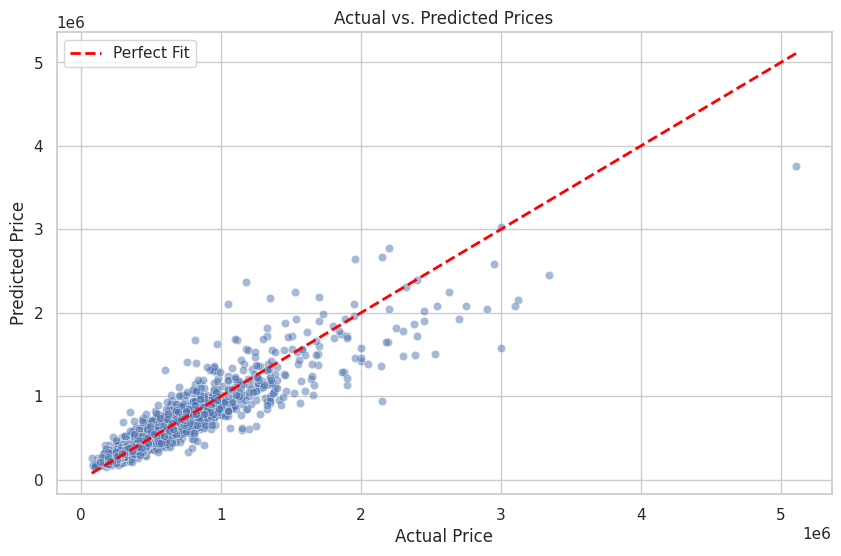

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a DataFrame to compare Side-by-Side
# We use .values.flatten() to ensure both arrays have the same shape and no index conflicts
results_df = pd.DataFrame({
    'Actual Price': y_test.values.flatten(),
    'Predicted Price': y_pred.flatten()
})

results_df['Difference'] = results_df['Actual Price'] - results_df['Predicted Price']
results_df['% Error'] = (results_df['Difference'] / results_df['Actual Price']) * 100

pd.options.display.float_format = '{:,.2f}'.format

print("First 10 Predictions vs Actuals:")
display(results_df.head(10))

#  Visualizing the Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_df, alpha=0.5)

# Draw a red line for "Perfect Prediction" (where Actual == Predicted)
plt.plot([results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         [results_df['Actual Price'].min(), results_df['Actual Price'].max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# 1. Transform the Target (Price) to Log scale
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# 2. Retrain the Model on the Log prices
print("Training on Log-Transformed Prices...")
model.fit(X_train, y_train_log)  # X_train still has lat/long!

# 3. Predict (The output will be in Log scale)
y_pred_log = model.predict(X_test)

# 4. Convert predictions back to Real Dollars (Inverse Log)
y_pred_actual = np.expm1(y_pred_log)

# 5. Evaluate
new_r2 = r2_score(y_test, y_pred_actual)
print(f"Original R2 Score: 0.86")
print(f"New R2 Score:      {new_r2:.4f}")

#  Check the new MSE
new_rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
print(f"New RMSE: ${new_rmse:,.0f}")

Training on Log-Transformed Prices...
Original R2 Score: 0.86
New R2 Score:      0.8451
New RMSE: $139,442


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

gbr_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# 2. Train (Use original X_train and y_train - NO log transform)
print("Training Gradient Boosting Model...")
gbr_model.fit(X_train, y_train)

# 3. Evaluate
y_pred_gbr = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)

print(f"Score (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")

Training Gradient Boosting Model...
Score (R2): 0.8742
Mean Absolute Error (MAE): 69,749.70


Gradient Boosting - Predictions vs Actuals:


,Actual Price,Predicted Price,Difference,% Error
0,612000,"625,552.98","-13,552.98",-2.21
1,392000,"362,048.35","29,951.65",7.64
2,399888,"378,172.88","21,715.12",5.43
3,385000,"361,270.00","23,730.00",6.16
4,235000,"289,795.42","-54,795.42",-23.32
5,390000,"413,952.02","-23,952.02",-6.14
6,485000,"539,425.15","-54,425.15",-11.22
7,1695000,"1,297,707.89","397,292.11",23.44
8,650000,"626,693.87","23,306.13",3.59
9,275000,"301,273.16","-26,273.16",-9.55


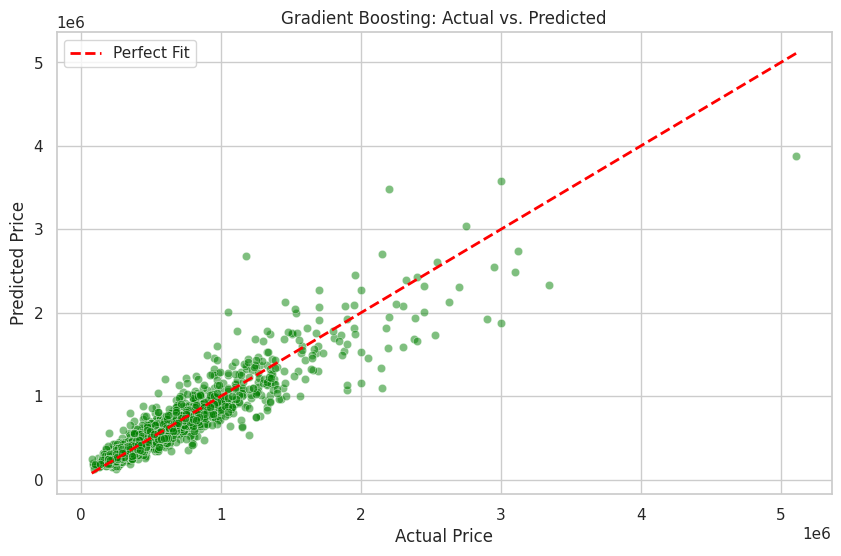

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate Predictions from your new GBR model
y_pred_gbr = gbr_model.predict(X_test)

# 2. Create the Comparison Table
results_gbr = pd.DataFrame({
    'Actual Price': y_test.values.flatten(),
    'Predicted Price': y_pred_gbr.flatten()
})

# 3. Calculate Errors
results_gbr['Difference'] = results_gbr['Actual Price'] - results_gbr['Predicted Price']
results_gbr['% Error'] = (results_gbr['Difference'] / results_gbr['Actual Price']) * 100

pd.options.display.float_format = '{:,.2f}'.format
print("Gradient Boosting - Predictions vs Actuals:")
display(results_gbr.head(10))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Price', y='Predicted Price', data=results_gbr, alpha=0.5, color='green')

# The "Perfect Fit" line
plt.plot([results_gbr['Actual Price'].min(), results_gbr['Actual Price'].max()],
         [results_gbr['Actual Price'].min(), results_gbr['Actual Price'].max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Predicting Prices on `test (2).csv` using Gradient Boosting Model

In [34]:
import pandas as pd

# 1. Load the test data
file_path_test = '/content/test (2).csv'
df_test_predict = pd.read_csv(file_path_test)

# Keep a copy of original IDs if available for output
original_test_ids = None
if 'id' in df_test_predict.columns:
    original_test_ids = df_test_predict['id']

# 2. Apply the same feature engineering as training data
# Create 'is_renovated' feature
if 'yr_renovated' in df_test_predict.columns:
    df_test_predict['is_renovated'] = (df_test_predict['yr_renovated'] > 0).astype(int)
else:
    # If yr_renovated is not in the test set, create is_renovated with a default value (0) for consistency
    df_test_predict['is_renovated'] = 0

# 3. Drop the same columns as in the training data
cols_to_drop_from_test = ['yr_renovated', 'id', 'date', 'sqft_living', 'zipcode']
# Filter out columns that are not actually in df_test_predict to prevent KeyError
cols_to_drop_from_test = [col for col in cols_to_drop_from_test if col in df_test_predict.columns]
df_test_predict = df_test_predict.drop(columns=cols_to_drop_from_test, errors='ignore') # Use errors='ignore' for robustness

df_test_predict.dropna(inplace=True)

# Get the columns from X_train (features used during training)
train_cols = X_train.columns.tolist()

# Create a new DataFrame for test features with columns aligned to X_train
X_test_final_for_prediction = pd.DataFrame(columns=train_cols)

for col in train_cols:
    if col in df_test_predict.columns:
        X_test_final_for_prediction[col] = df_test_predict[col]
    else:
        # If a column from X_train is missing in df_test_predict, fill with 0 (or a sensible default)
        X_test_final_for_prediction[col] = 0.0 # Use float for numerical consistency

X_test_final_for_prediction = X_test_final_for_prediction[train_cols]

X_test_scaled_for_prediction = X_test_final_for_prediction.copy()

# Check for `numerical_cols` variable in the global scope
if 'numerical_cols' not in globals():
    numerical_cols = [col for col in X_train.select_dtypes(include=['int64', 'float64']).columns.tolist() if col != 'is_renovated']

cols_to_scale_in_test_final = [col for col in numerical_cols if col in X_test_scaled_for_prediction.columns]

if not X_test_scaled_for_prediction.empty and cols_to_scale_in_test_final:
    X_test_scaled_for_prediction[cols_to_scale_in_test_final] = scaler.transform(X_test_scaled_for_prediction[cols_to_scale_in_test_final])

# 7. Make predictions using the gbr_model
if not X_test_scaled_for_prediction.empty:
    test_predictions_gbr = gbr_model.predict(X_test_scaled_for_prediction)
    print("Predictions generated successfully!")

    # Display predictions
    predictions_df = pd.DataFrame({
        'Predicted_Price': test_predictions_gbr
    })

    if original_test_ids is not None:
        if len(original_test_ids) == len(predictions_df):
             predictions_df.insert(0, 'id', original_test_ids.values)
        else:
             print("Warning: Number of original test IDs does not match number of predictions. IDs will not be included.")

    display(predictions_df.head())
else:
    print("No data left in the test set after preprocessing to make predictions.")

Predictions generated successfully!


,id,Predicted_Price
0,2591820310,"475,878.47"
1,7974200820,"1,078,370.06"
2,7701450110,"1,170,207.06"
3,9522300010,"2,356,081.89"
4,9510861140,"957,290.33"


In [36]:
# Generate a CSV file with 'id' and 'Predicted_Price'
predictions_df.to_csv('predictions.csv', index=False)
print("predictions.csv generated successfully!")

predictions.csv generated successfully!
